### Customer Segmentation Model - Selore Nigeria

## UNSUPERVISED MACHINE LEARNING - Clustering using Kmeans

K-means clustering is an unsupervised machine learning technique that is suitable for working with unlabelled data that lacks predefined categories or groups. The primary objective of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on the features, that are provided.

In [1]:
#import required libraries

#For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Data Analysis libraries
import pandas as pd
import numpy as np

#Machine learning and Evaluation Libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data

data = pd.read_csv(r"D:\johns\Documents\PERSONAL VITAL DOCUMENTS\Full Stack Data Science - 10Alytics\10ALYTICS July 2023 Cohort\Week 12\Assignment - WMDI\Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


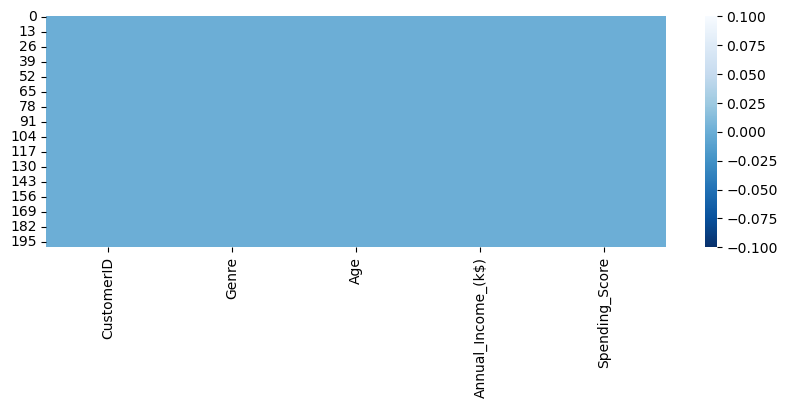

In [6]:
#Check for missing values
print(data.isnull().sum())

#visualising the missing data 
plt.figure(figsize=(10, 3))
sns.heatmap(data.isnull(), cbar=True, cmap='Blues_r');

Narration

## Data Cleaning and Pre-processing

In [7]:
# check for duplicates
print(data.duplicated().sum())

0


In [8]:
# Rename the column 'Genre'
data.rename(columns={'Genre': 'Gender'}, inplace=True)

# Display the DataFrame with the updated column name
print(data)

     CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]


In [9]:
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EXPLORATORY DATA ANALYSIS

- Univariate
- Bivariate
- Multivariate

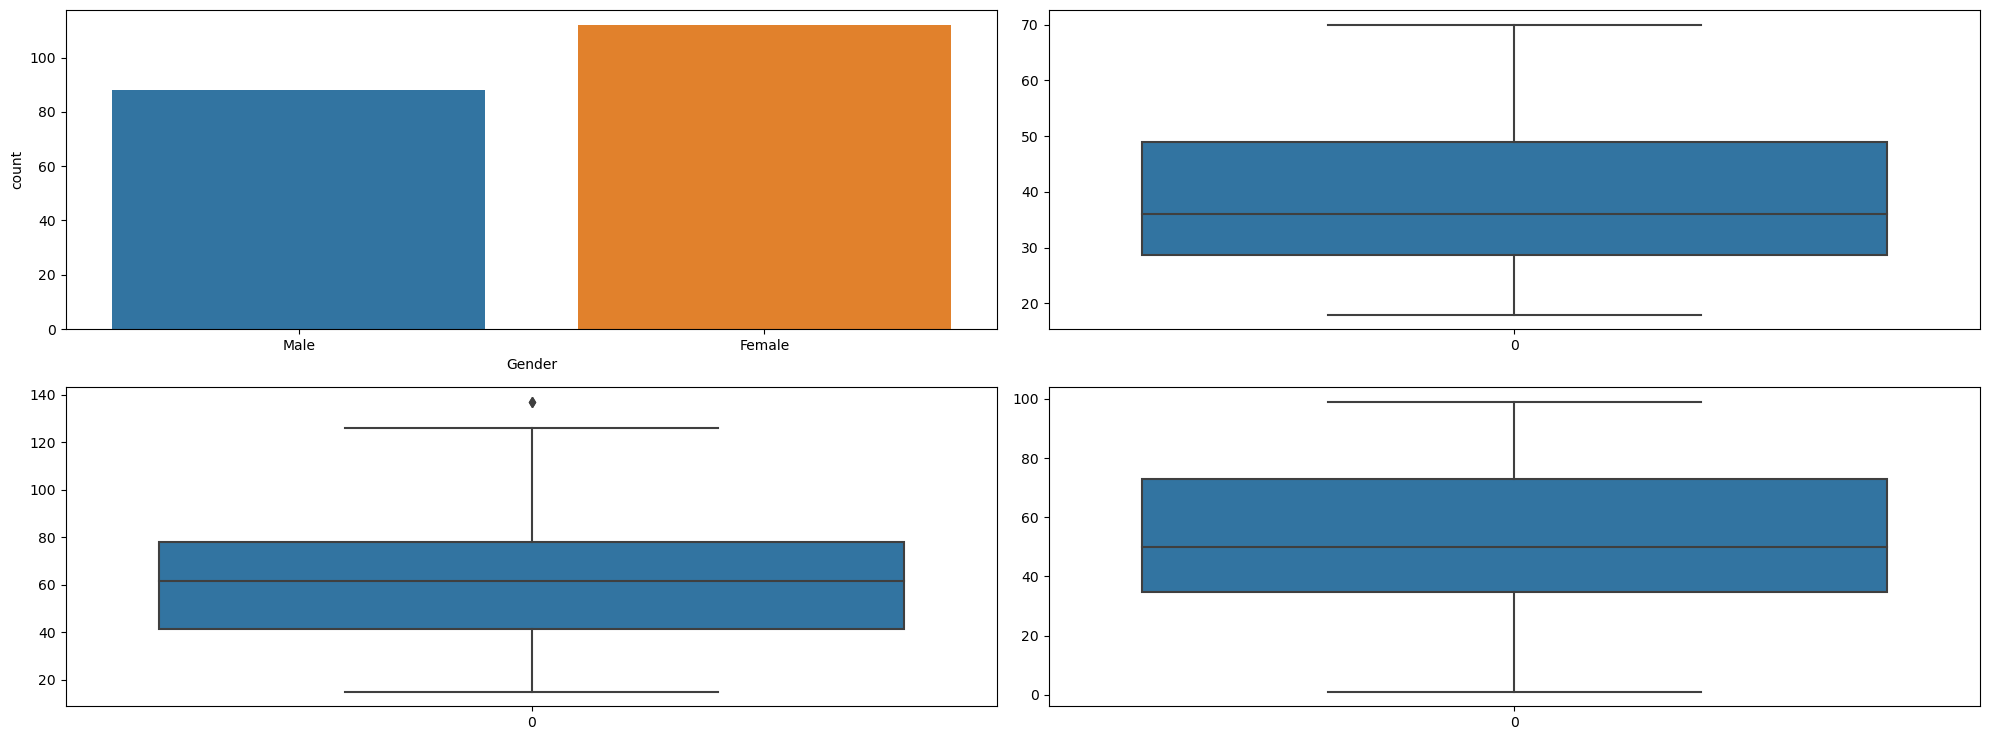

In [10]:
fig, axs = plt.subplots(2,2, figsize = (20, 7.5))
plt1 = sns.countplot(x=data['Gender'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

Narration

In [11]:
data.columns[1:]

Index(['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [12]:
#for machine learning, convert any categorical varaibles to numerical variables

from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() #method initialisation

#looping for columns except survived
for c in data.columns[1:]:
    if data[c].dtype == 'object':
        data[c] = encoder.fit_transform(data[c])  # Apply fit_transform to encode the column
    else:
        data[c] = data[c]

data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
# OR this method.

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate through columns and encode object-type columns
for c in data.columns[1:]:
    if data[c].dtype == 'object':
        data[c] = encoder.fit_transform(data[c])  # Apply fit_transform to encode the column
    else:
        pass  # Do nothing for non-object type columns
    
data.head()    

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
#Remove CustomerID column as not relevant for machine learning
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


After applying the K-means clustering algorithm, we can determine the optimal number of clusters by using the Elbow method. This method involves plotting the Within Cluster Sum of Sqaures(WCSS) against the number of clusters (K) and selecting the value of K, where the rate of decrease in WCSS slows down significantly. 

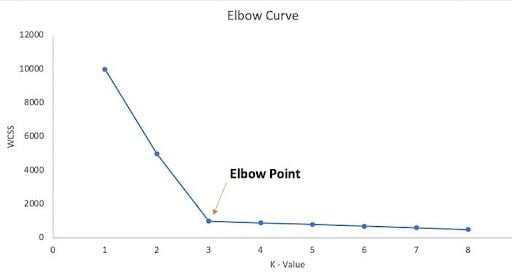

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow. 


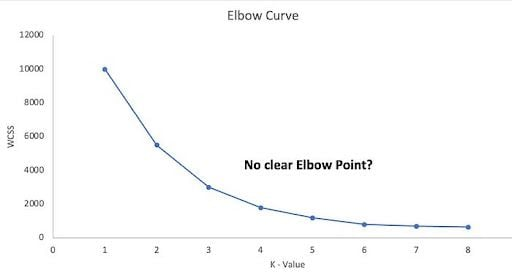

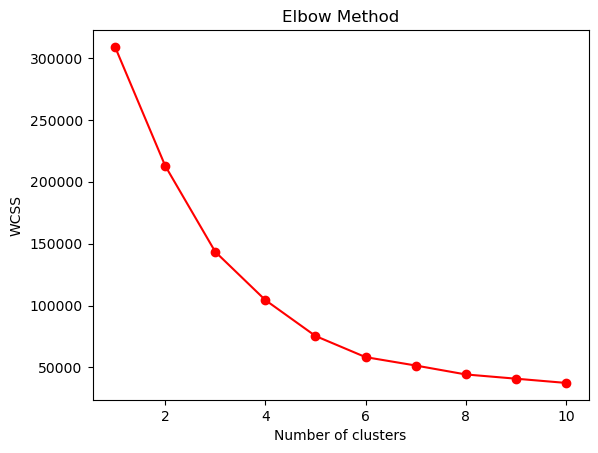

In [15]:
# Determine the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the above code block, the objective is to determine the optimal number of clusters for the Kmeans clustering algorithm. The optimal number of clusters is important because it affects the quality of the clustering results.

The Within-Cluster Sum of Squares (WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of the squared distance between each point and the corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WCSS starts to decrease at a slower rate.

The 'For' loop iterates over a range of values from 1 to 10, creating a Kmeans clustering model for each value of i. The 'init' parameter is set to 'k-means++', which is a method to initialize the centroids in smart way to speed up convergence. The 'random_state' parameter is set to 42 for reproducibility. The 'fit' method is used to fit the KMeans model to the data and the inertia (WCSS) is computed and appended to the 'wcss' list.

Finally, a plot is created with a number of clusters on the x-axis and the WCSS on the y-axis. The plot is called the 'Elbow Method' because it looks like an elbow, where the optimal number of clusters is the point, where the WCSS starts to decrease at a slower rate. In this case, the plot shows that the optimal number of clusters is 5, as the WCSS starts to decrease at a slower rate beyond the point.

In [16]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add clusterlabels to data
data['Cluster'] = kmeans.labels_

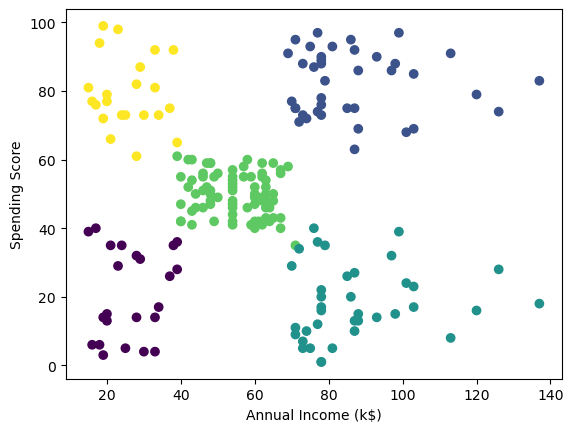

0.44493777835059417

In [17]:
# Visualize cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

# Calculate the Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

#### Narration

The **Silhouette score** is 0.44493777835059417

Describing the 5 clusters as seen in the above visualisation;

- The **1st cluster** captures low income earners that equally spend low or not as much and likely saves more, and as a result, left with spare cash, to patronize later.
- The **2nd Cluster** shows low income earners that spend highly and likely with less ability to save, and little or nothing left to spend later.
- The **3rd Cluster** captures middle-class income earners as average spenders (neither low or high spending) or spending averagely.
- The **4th cluster** shows High Income earners as equally spending high as well, likely customers with high spending habits.
- The **5th cluster** captures High Income earners as surprisingly low spending customers, and clearly big on saving or having less need to spend much.